In [ ]:
#Name-Aniket Bhavar


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('titanic (1).csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  How to handle missing values

In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
round((data.isna().sum() / len(data))*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [6]:
df = data.copy()
df = df.dropna(axis=0)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
print('Dataset Size With Missing Values',data.shape)

Dataset Size With Missing Values (891, 12)


In [8]:
print('Dataset Size Without Missing Values',df.shape)

Dataset Size Without Missing Values (183, 12)


In [9]:
df = data.copy()
df = df.drop(['Cabin','Age','Embarked'],axis=1) 
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


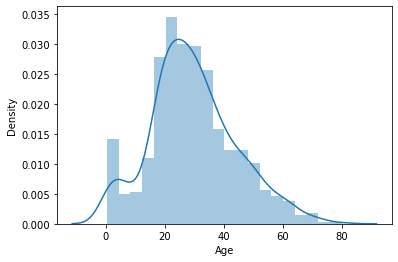

In [10]:
sns.distplot(data.Age);

In [11]:
def impute_nan_mean(df,column,mean):
    df[column+'_mean'] = df[column].fillna(mean)
    return df

mean_val = data.Age.mean()
titanic = impute_nan_mean(data,'Age',mean_val)

In [12]:
data[data.Age.isna()][['Age','Age_mean']]

,Age,Age_mean
5,NaN,29.699118
17,NaN,29.699118
19,NaN,29.699118
26,NaN,29.699118
28,NaN,29.699118
...,...,...
859,NaN,29.699118
863,NaN,29.699118
868,NaN,29.699118
878,NaN,29.699118


In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [14]:
def impute_nan_median(df,column,median):
    df[column+'_median'] = df[column].fillna(median)
    return df

median_val = titanic.Age.median()
data = impute_nan_median(data,'Age',median_val)

In [15]:
data[data.Age.isna()][['Age','Age_median']]

,Age,Age_median
5,NaN,28.0
17,NaN,28.0
19,NaN,28.0
26,NaN,28.0
28,NaN,28.0
...,...,...
859,NaN,28.0
863,NaN,28.0
868,NaN,28.0
878,NaN,28.0


In [16]:
# Imputing missing value with median value of the column
def impute_nan_mode(df,column,mode):
    df[column+'_mode'] = df[column].fillna(mode)
    return df

mode_val = data.Age.mode()
data = impute_nan_mode(data,'Age',mode_val)

In [17]:
data[data.Age.isna()][['Age','Age_mode']]

,Age,Age_mode
5,NaN,NaN
17,NaN,NaN
19,NaN,NaN
26,NaN,NaN
28,NaN,NaN
...,...,...
859,NaN,NaN
863,NaN,NaN
868,NaN,NaN
878,NaN,NaN


In [18]:
data[data.Age.notna()]['Age'].mode()[0]

24.0

In [19]:
# Imputing missing value with median value of the column
def impute_nan_mode(df,column,mode):
    df[column+'_mode'] = df[column].fillna(mode)
    return df

mode_val = data[data.Age.notna()]['Age'].mode()[0]    ## find mode of all the non missing values of Age column
data = impute_nan_mode(data,'Age',mode_val)

In [20]:
data[data.Age.isna()][['Age','Age_mode']]

,Age,Age_mode
5,NaN,24.0
17,NaN,24.0
19,NaN,24.0
26,NaN,24.0
28,NaN,24.0
...,...,...
859,NaN,24.0
863,NaN,24.0
868,NaN,24.0
878,NaN,24.0


# Capturing Missing Values with new feature.

In [21]:
data['Age_nan']=np.where(data['Age'].isnull(),1,0)

In [22]:
data['Cabin_nan']=np.where(titanic['Cabin'].isnull(),1,0)

In [23]:
data.iloc[:5][['Cabin','Cabin_nan']]

,Cabin,Cabin_nan
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1


In [24]:
data['Cabin'].mode()[0]

'B96 B98'

In [25]:
data['Cabin'].fillna(data['Cabin'].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [26]:
data['Age_nan']=np.where(data['Age'].isnull(),1,0)


In [27]:
data[['Age','Age_nan']]

,Age,Age_nan
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0
...,...,...
886,27.0,0
887,19.0,0
888,NaN,1
889,26.0,0


 How to handle categorical features.-Feature encoding


In [28]:
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns:
    print(column)
    print(data[column].unique())
    print(data[column].unique())

Pclass
[3 1 2]
[3 1 2]
Sex
['male' 'female']
['male' 'female']
SibSp
[1 0 3 4 2 5 8]
[1 0 3 4 2 5 8]
Parch
[0 1 2 5 3 4 6]
[0 1 2 5 3 4 6]
Embarked
['S' 'C' 'Q' nan]
['S' 'C' 'Q' nan]


<AxesSubplot:>

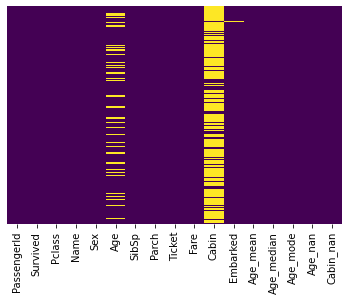

In [29]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')



<AxesSubplot:xlabel='Survived', ylabel='count'>

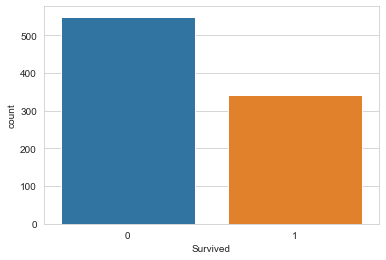

In [30]:
 sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)


<AxesSubplot:xlabel='Survived', ylabel='count'>

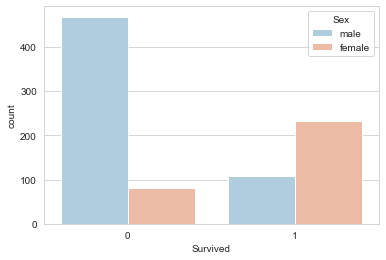

In [31]:
 sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

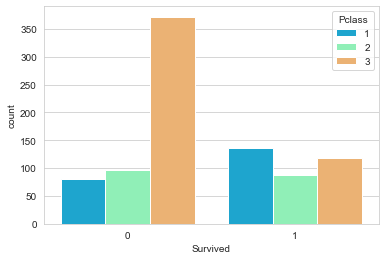

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

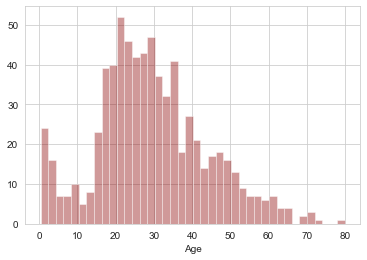

In [33]:
 sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

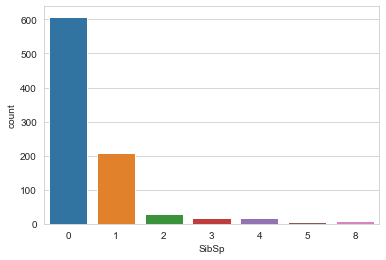

In [34]:
 sns.countplot(x='SibSp',data=data)

<AxesSubplot:>

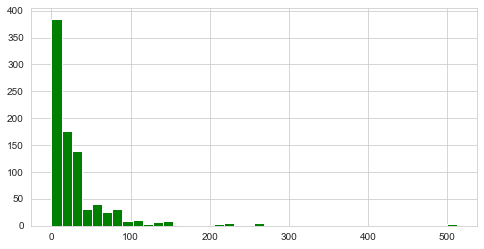

In [35]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))


In [36]:
#categorial values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_mean     891 non-null    float64
 13  Age_median   891 non-null    float64
 14  Age_mode     891 non-null    float64
 15  Age_nan      891 non-null    int32  
 16  Cabin_nan    891 non-null    int32  
dtypes: float64(5), int32(2), int64(5), object(5)
memory usage: 111.5+ KB


In [37]:
pd.get_dummies(data['Embarked'],drop_first=True).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [38]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)


In [39]:

data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [40]:
data.head() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_mean,Age_median,Age_mode,Age_nan,Cabin_nan
0,1,0,3,22.0,1,0,7.2500,NaN,22.0,22.0,22.0,0,1
1,2,1,1,38.0,1,0,71.2833,C85,38.0,38.0,38.0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,26.0,26.0,26.0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,35.0,35.0,35.0,0,0
4,5,0,3,35.0,0,0,8.0500,NaN,35.0,35.0,35.0,0,1


In [41]:

data = pd.concat([data,sex,embark],axis=1)


In [42]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_mean,Age_median,Age_mode,Age_nan,Cabin_nan,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,22.0,22.0,22.0,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,38.0,38.0,38.0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,26.0,26.0,26.0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,35.0,35.0,35.0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,35.0,35.0,35.0,0,1,1,0,1


In [43]:
from sklearn.preprocessing import StandardScaler
# scale the train and test ages

scaler = StandardScaler()
data.Age = scaler.fit_transform(data.Age.values.reshape(-1,1))
data.Age = scaler.transform(data.Age.values.reshape(-1,1))

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


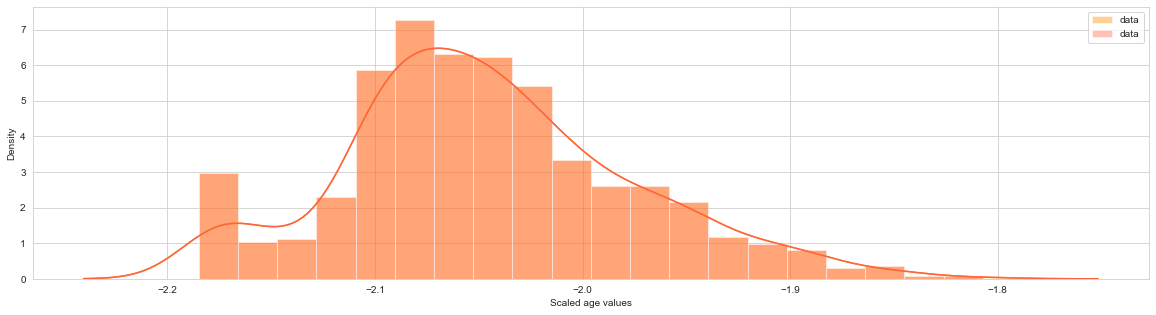

In [44]:
plt.figure(figsize=(20,5))
sns.distplot(data.Age.values, label="data", color="darkorange")
sns.distplot(data.Age.values, label="data", color="tomato");
plt.xlabel("Scaled age values");
plt.ylabel("Density")
plt.legend();

C:\Users\Aniket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


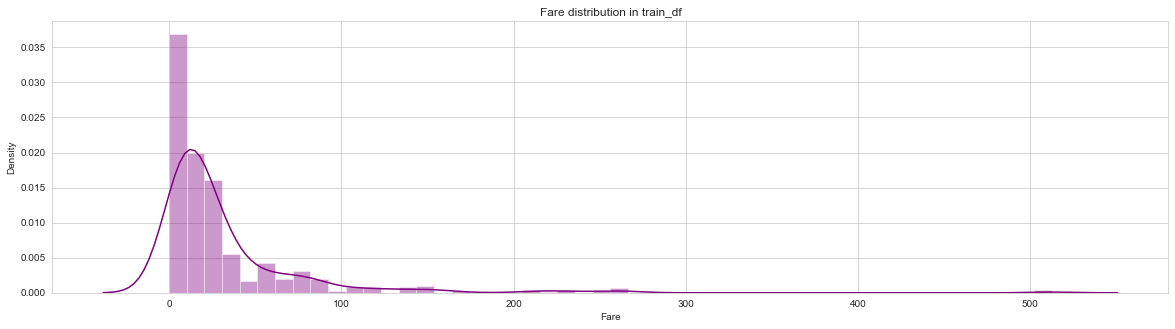

In [45]:
plt.figure(figsize=(20,5))
sns.distplot(data.Fare.values, color="Purple")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.title("Fare distribution in train_df");

In [46]:
original = np.random.normal(loc=0, scale=1, size=200)
# add an outlier
shifted = np.array(original.tolist() + [1000])
# comute the mean
print(np.mean(original))
print(np.mean(shifted))

0.08177318571818994
5.056490732057901
